In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [46]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


<AxesSubplot:>

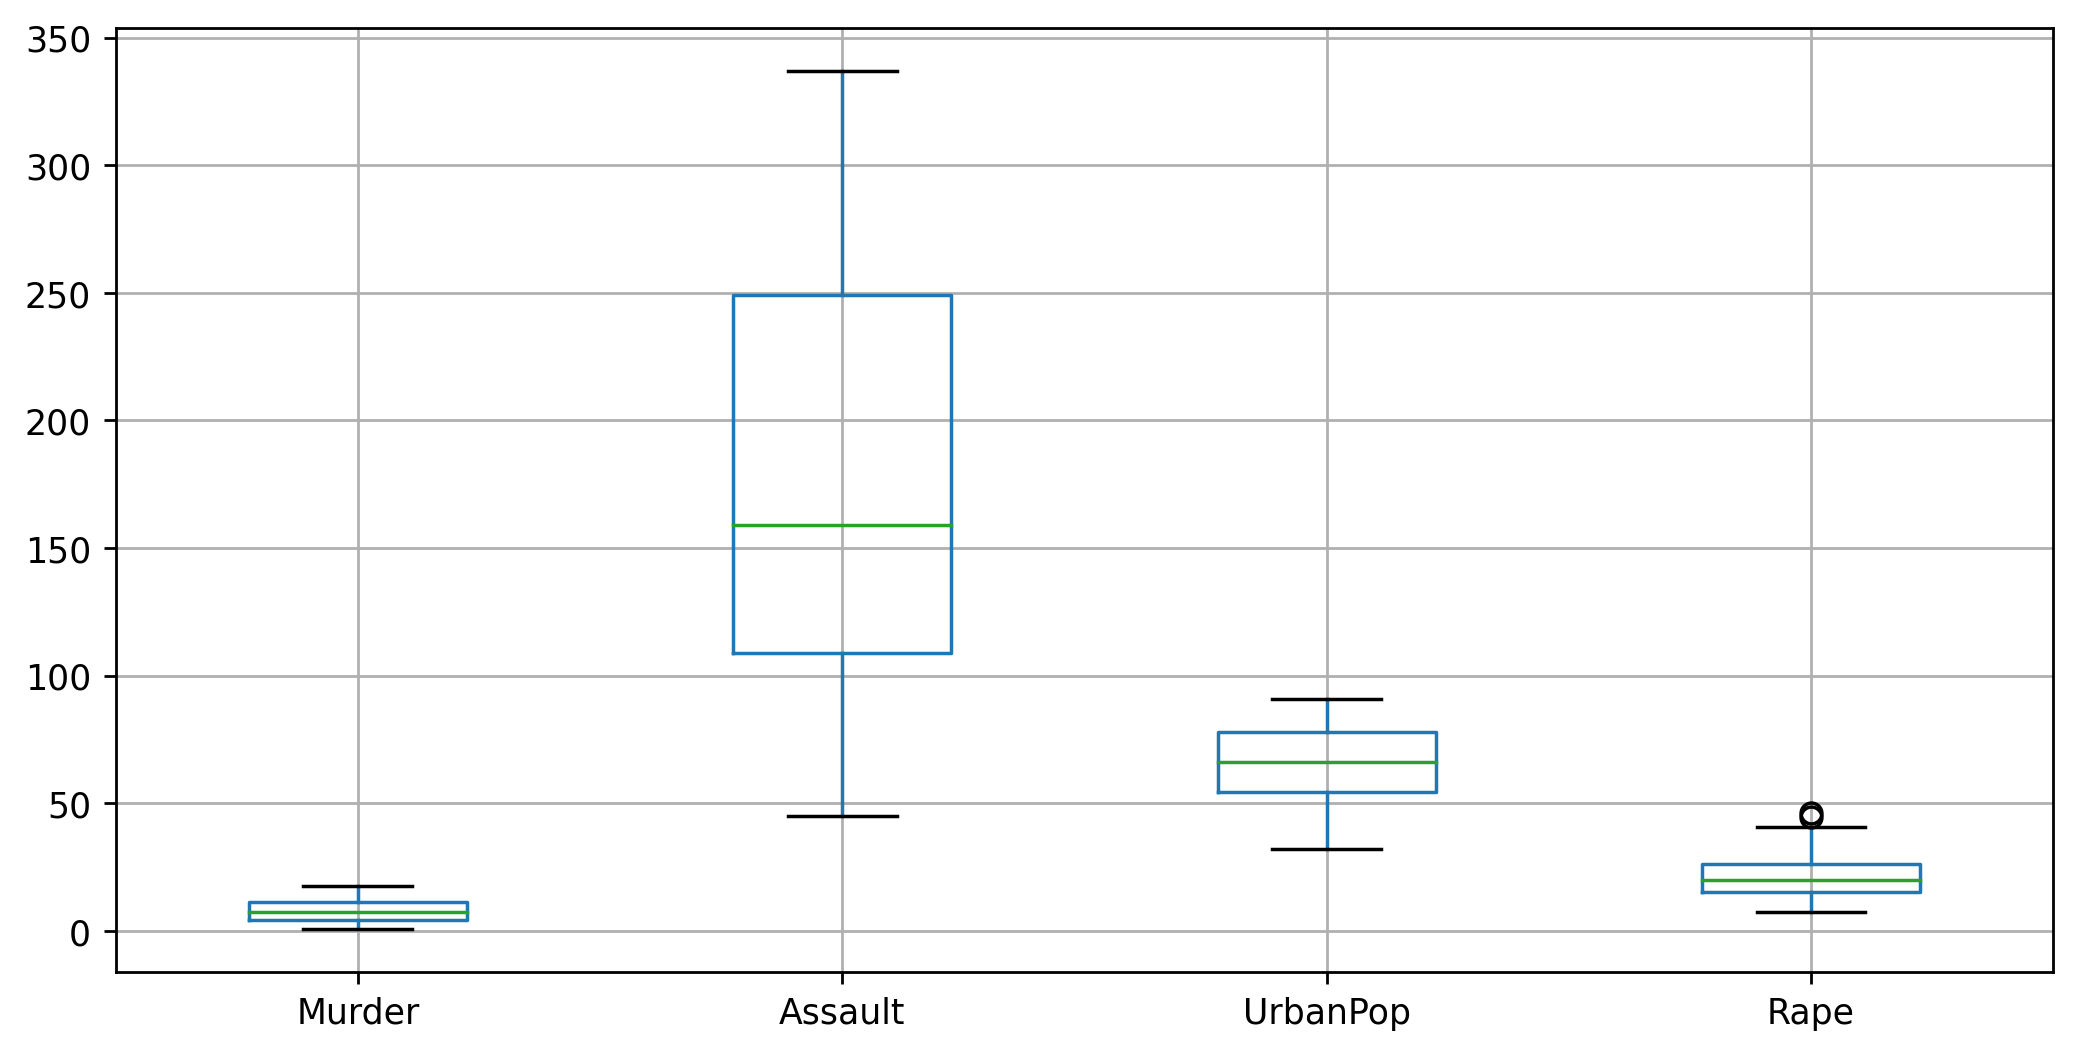

In [47]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

df.boxplot()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


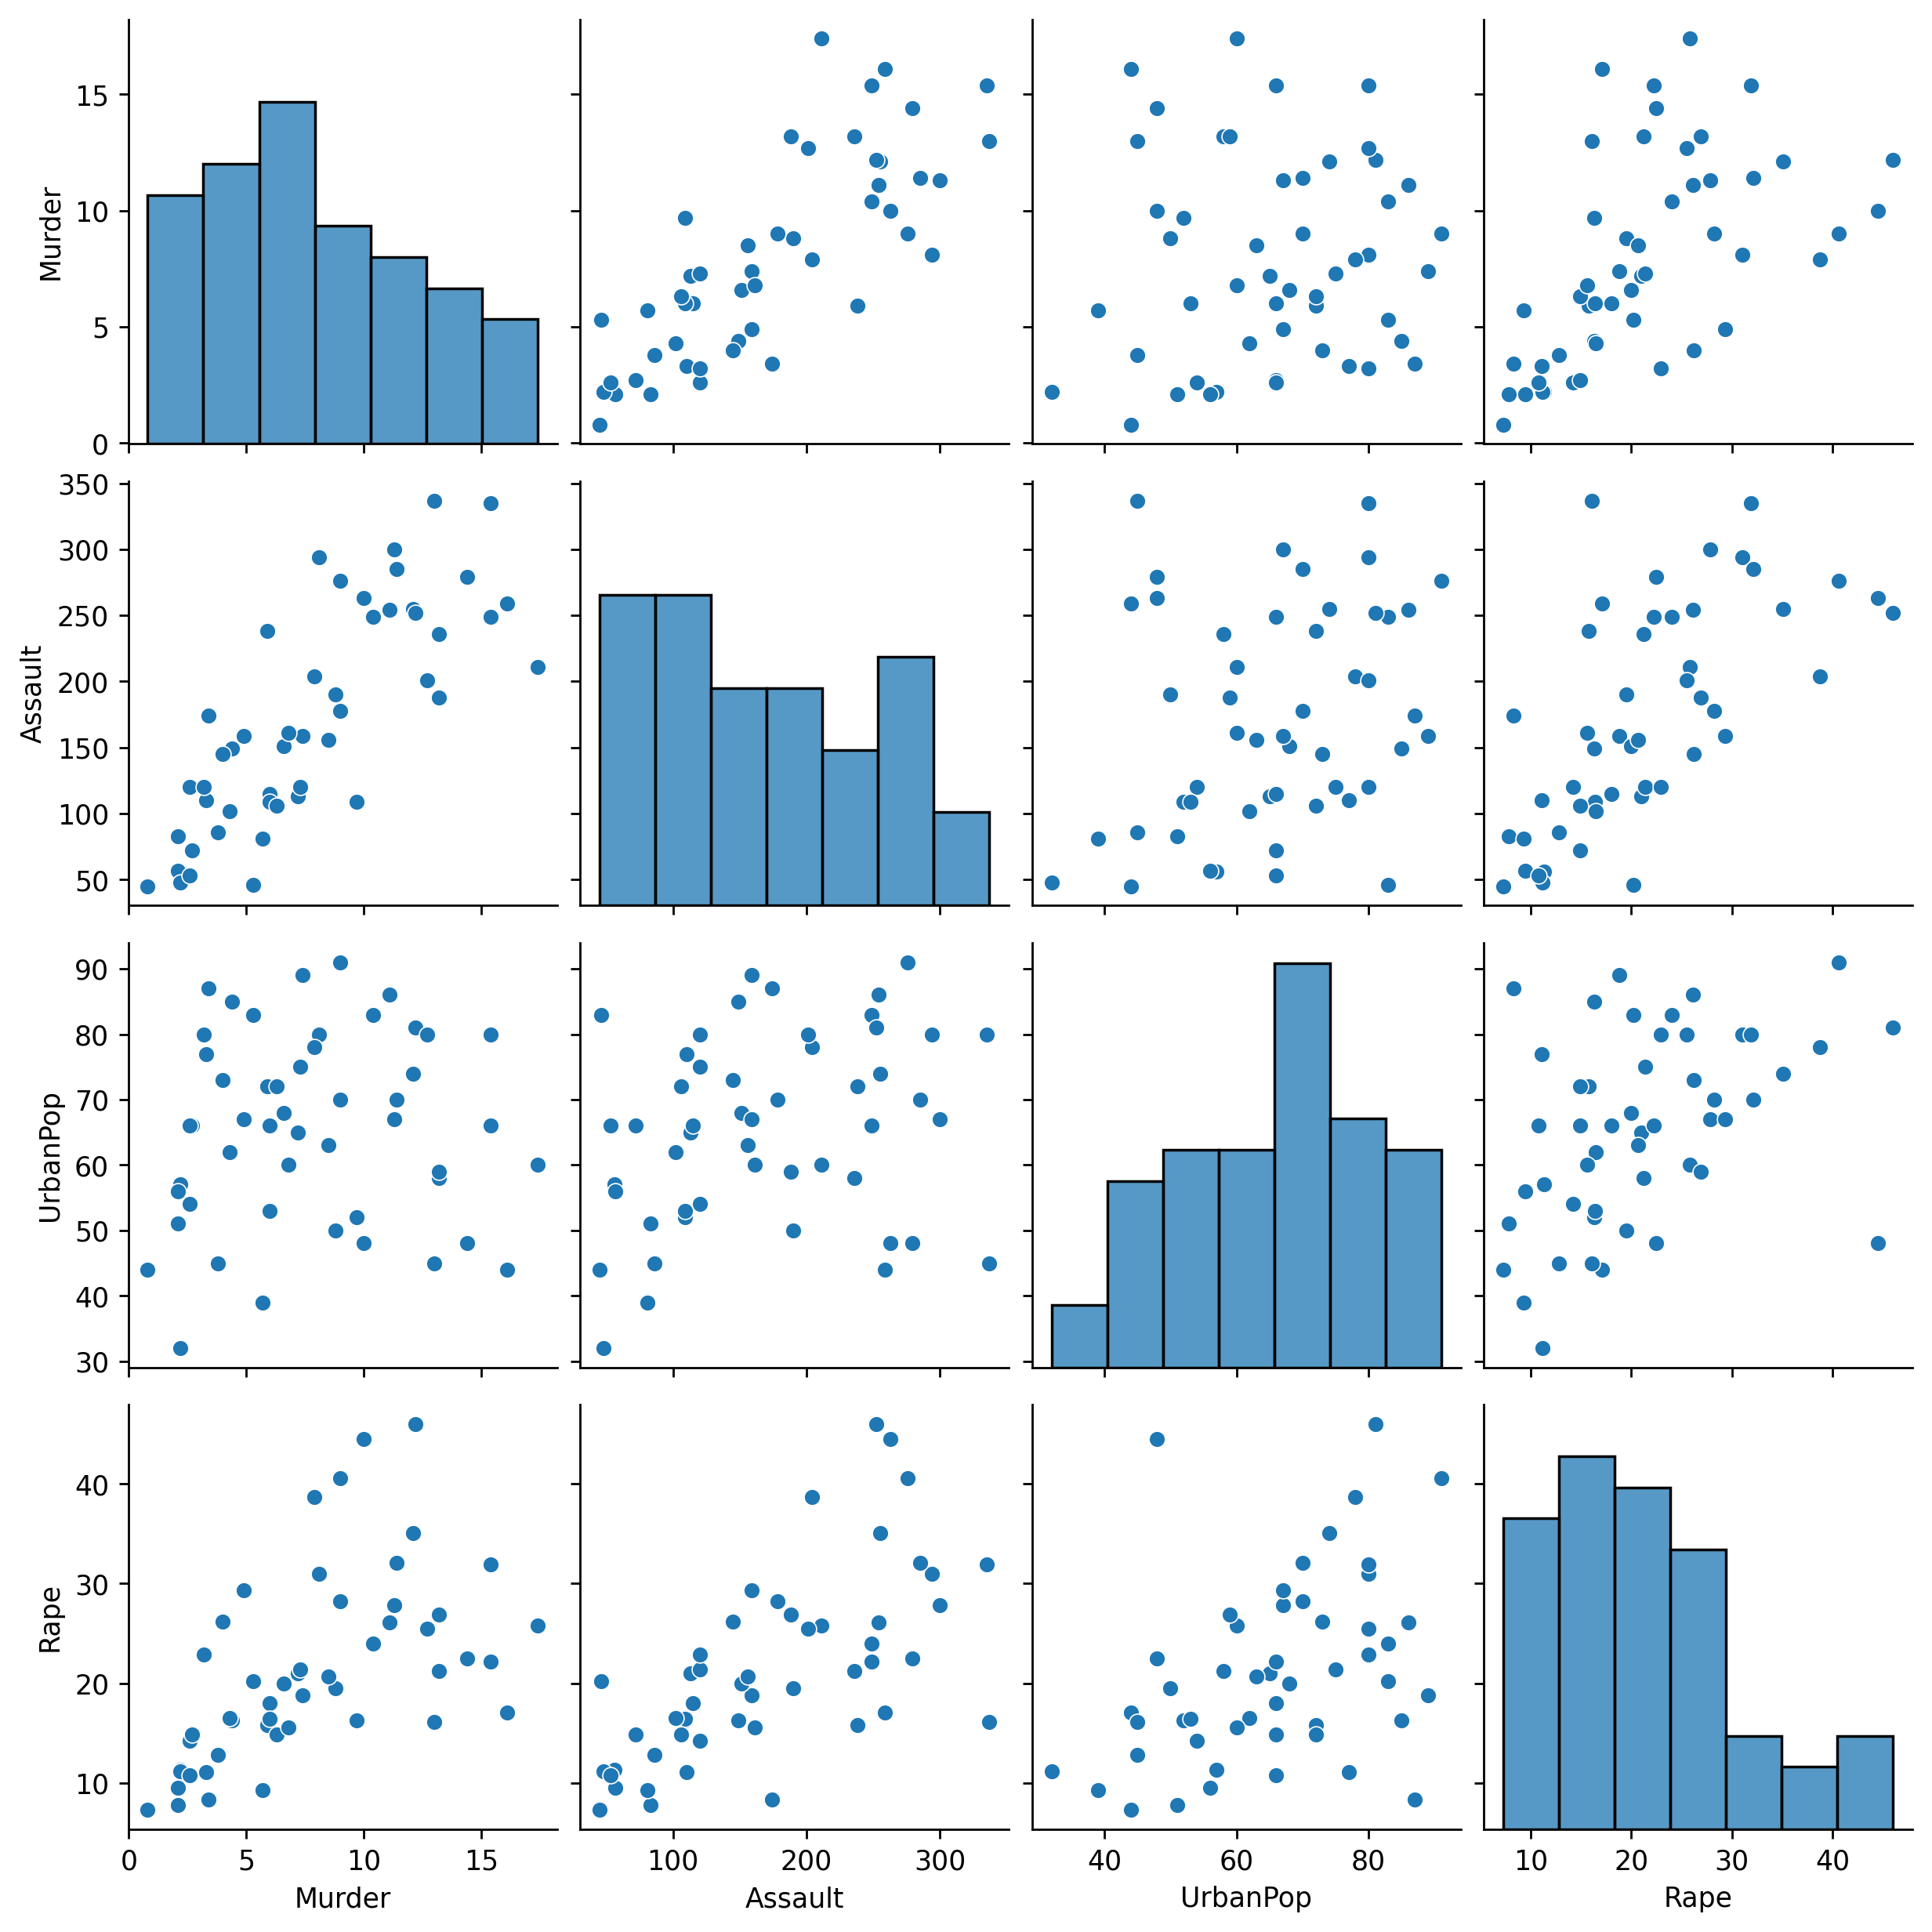

In [6]:
sns.pairplot(df)

In [86]:
x = df.drop(columns=['Unnamed: 0'])
x

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [8]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [87]:
x = sc.fit_transform(x)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Hierarchical Clustering

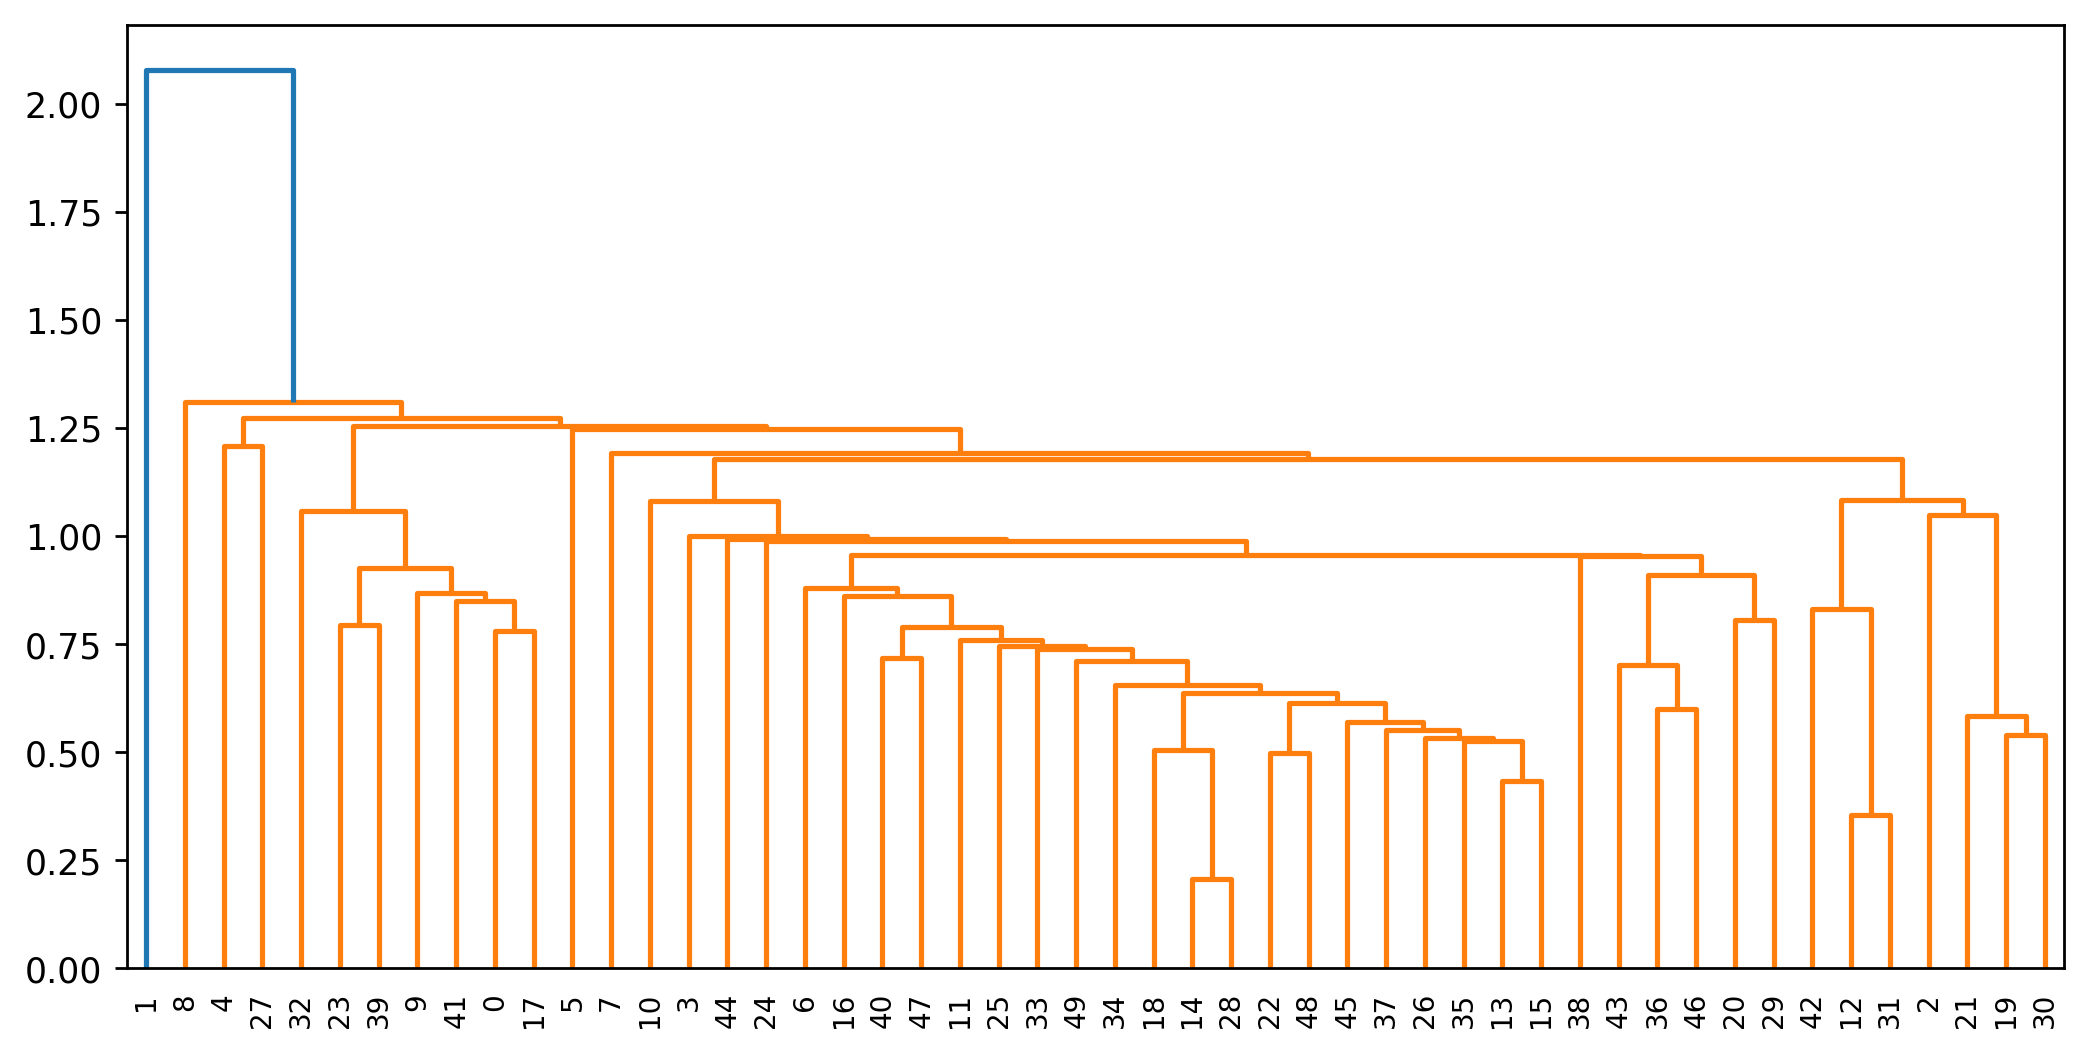

In [52]:
from scipy.cluster import hierarchy

lk = hierarchy.linkage(x)

dendrogram = hierarchy.dendrogram(lk)

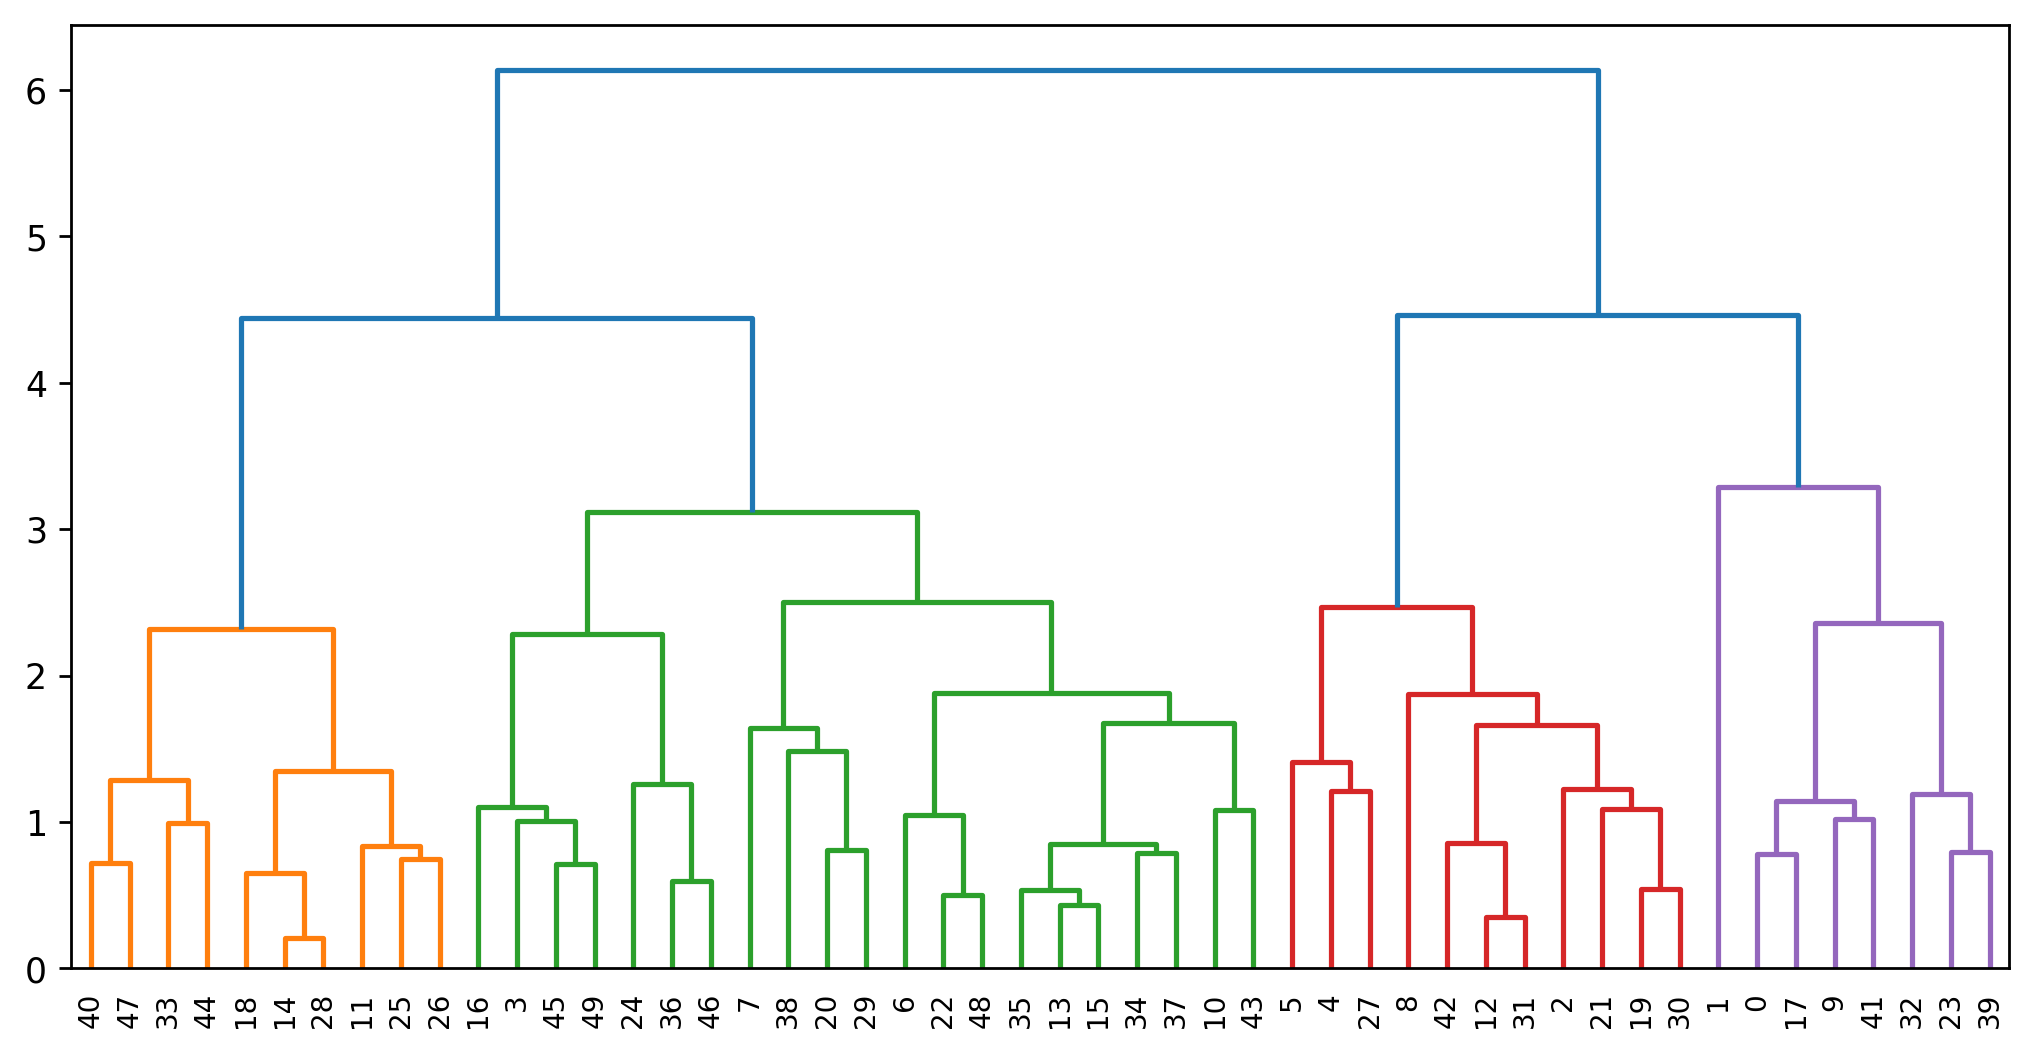

In [53]:
lk = hierarchy.linkage(x, method='complete')

dendrogram = hierarchy.dendrogram(lk)

In [54]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4)

y = hc.fit_predict(x)

y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [55]:
df['Cluster'] = y

df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [56]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [57]:
df[df['Cluster']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


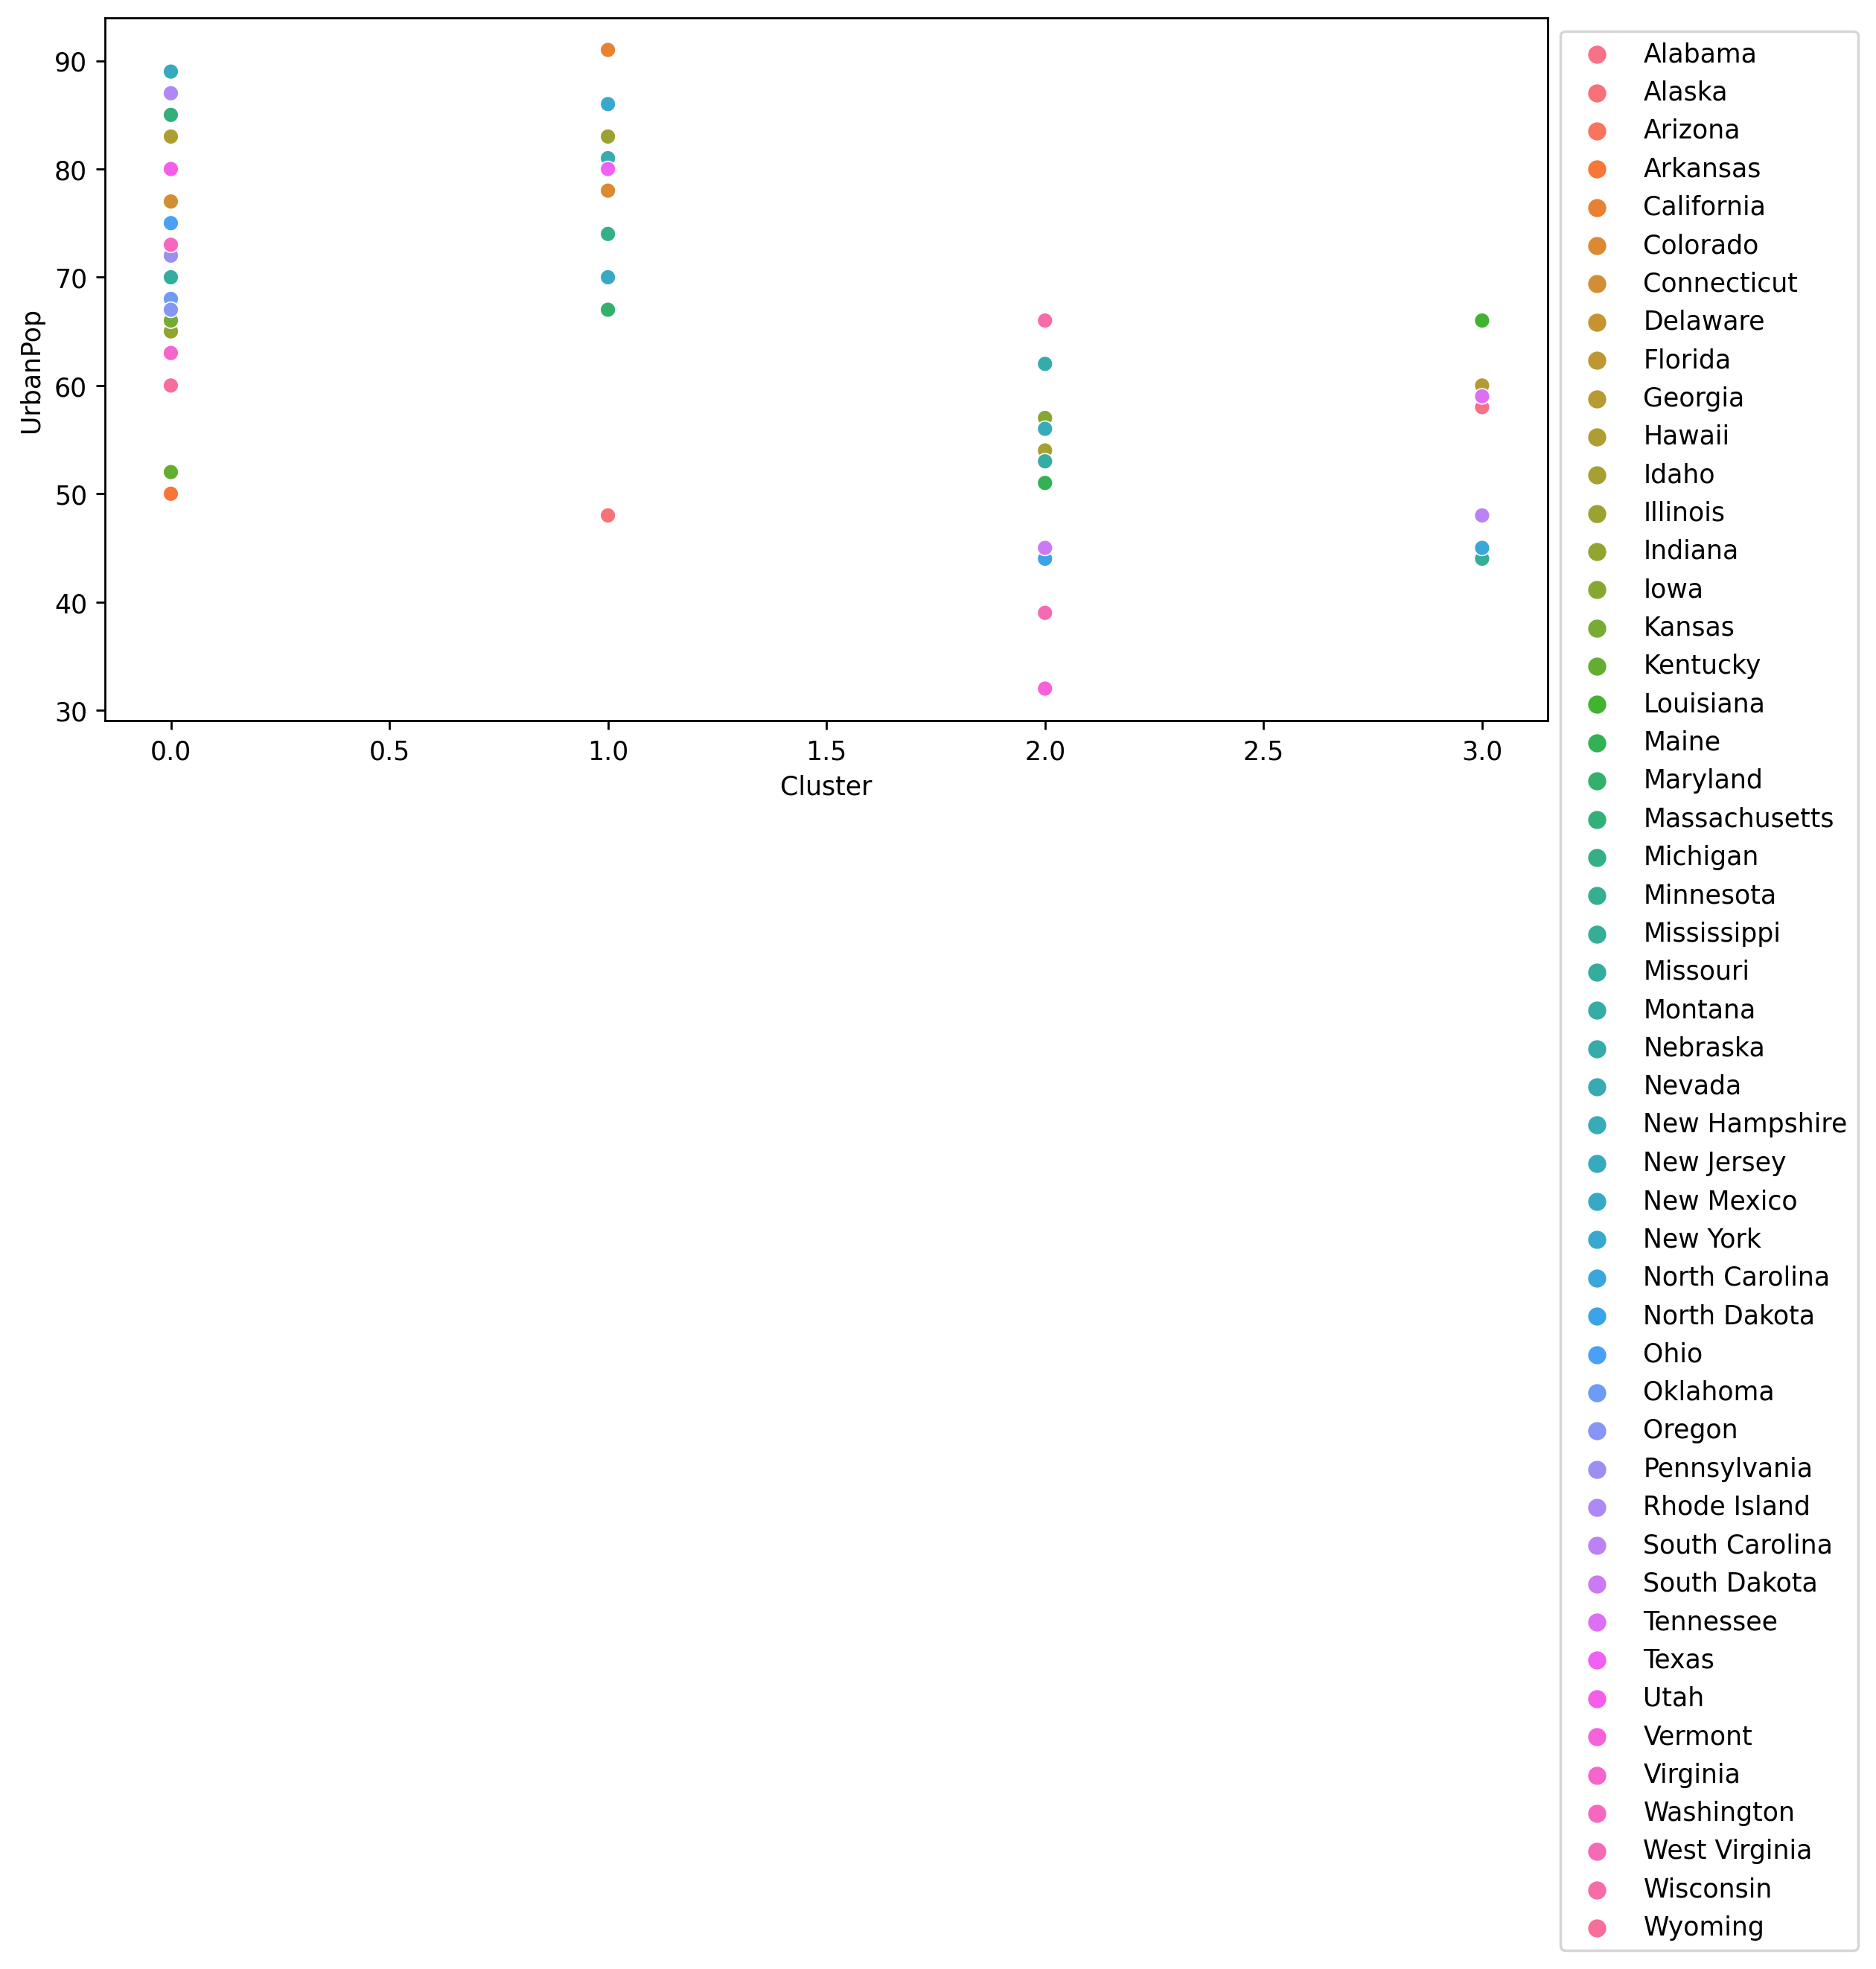

In [16]:
sns.scatterplot(df['Cluster'],df['UrbanPop'],hue=df['Unnamed: 0'])
plt.legend(bbox_to_anchor = (1,1))

## KMeans Clustering

In [58]:
from sklearn.cluster import KMeans
km = KMeans()
y = km.fit_predict(x)
km.cluster_centers_

array([[-0.67443853, -0.05769692,  1.14869656, -0.77349099],
       [-1.18467401, -1.2201201 , -1.01470522, -1.11321445],
       [ 0.80936747,  1.09651079,  0.7764984 ,  0.84615706],
       [ 1.59644066,  0.97606837, -0.78540457,  0.0489325 ],
       [ 0.03989114, -0.31224214, -0.69368431, -0.38092166],
       [ 0.44344101,  0.88775677,  1.2417461 ,  2.21463743],
       [-0.52832564, -0.64315093,  0.38801658, -0.02070695],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392]])

In [63]:
x2 = pd.DataFrame(x)
x2['Cluster'] = y
x2

,0,1,2,3,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,7
2,0.072361,1.493817,1.009122,1.053466,2
3,0.234708,0.233212,-1.084492,-0.186794,4
4,0.281093,1.275635,1.776781,2.088814,5
5,0.025976,0.402909,0.869548,1.883901,5
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,2
9,2.229265,0.487757,-0.386621,0.492653,3


In [64]:
x1 = x2.iloc[:,:-1]
x1

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


### Elbow Graph

In [20]:
wcss = []

for i in range(1,25):
    km = KMeans(n_clusters=i)
    km.fit_predict(x1)
    wcss.append(km.inertia_)


In [21]:
wcss

[200.0,
 104.96163315756871,
 80.0657554011071,
 57.55425863091104,
 49.969202844527935,
 45.16526288941434,
 41.6774311209674,
 36.286049370698294,
 31.09472771354566,
 26.742959078591817,
 24.247919849104935,
 22.840408712395462,
 21.290135628073294,
 18.554807579521928,
 18.159402808206476,
 17.020520279070194,
 15.575446782368594,
 14.582750253217558,
 13.51559290364305,
 12.452466418815582,
 11.756692398640144,
 10.8541172634491,
 10.36264127993902,
 9.737737142601231]

Text(0, 0.5, 'WCSS')

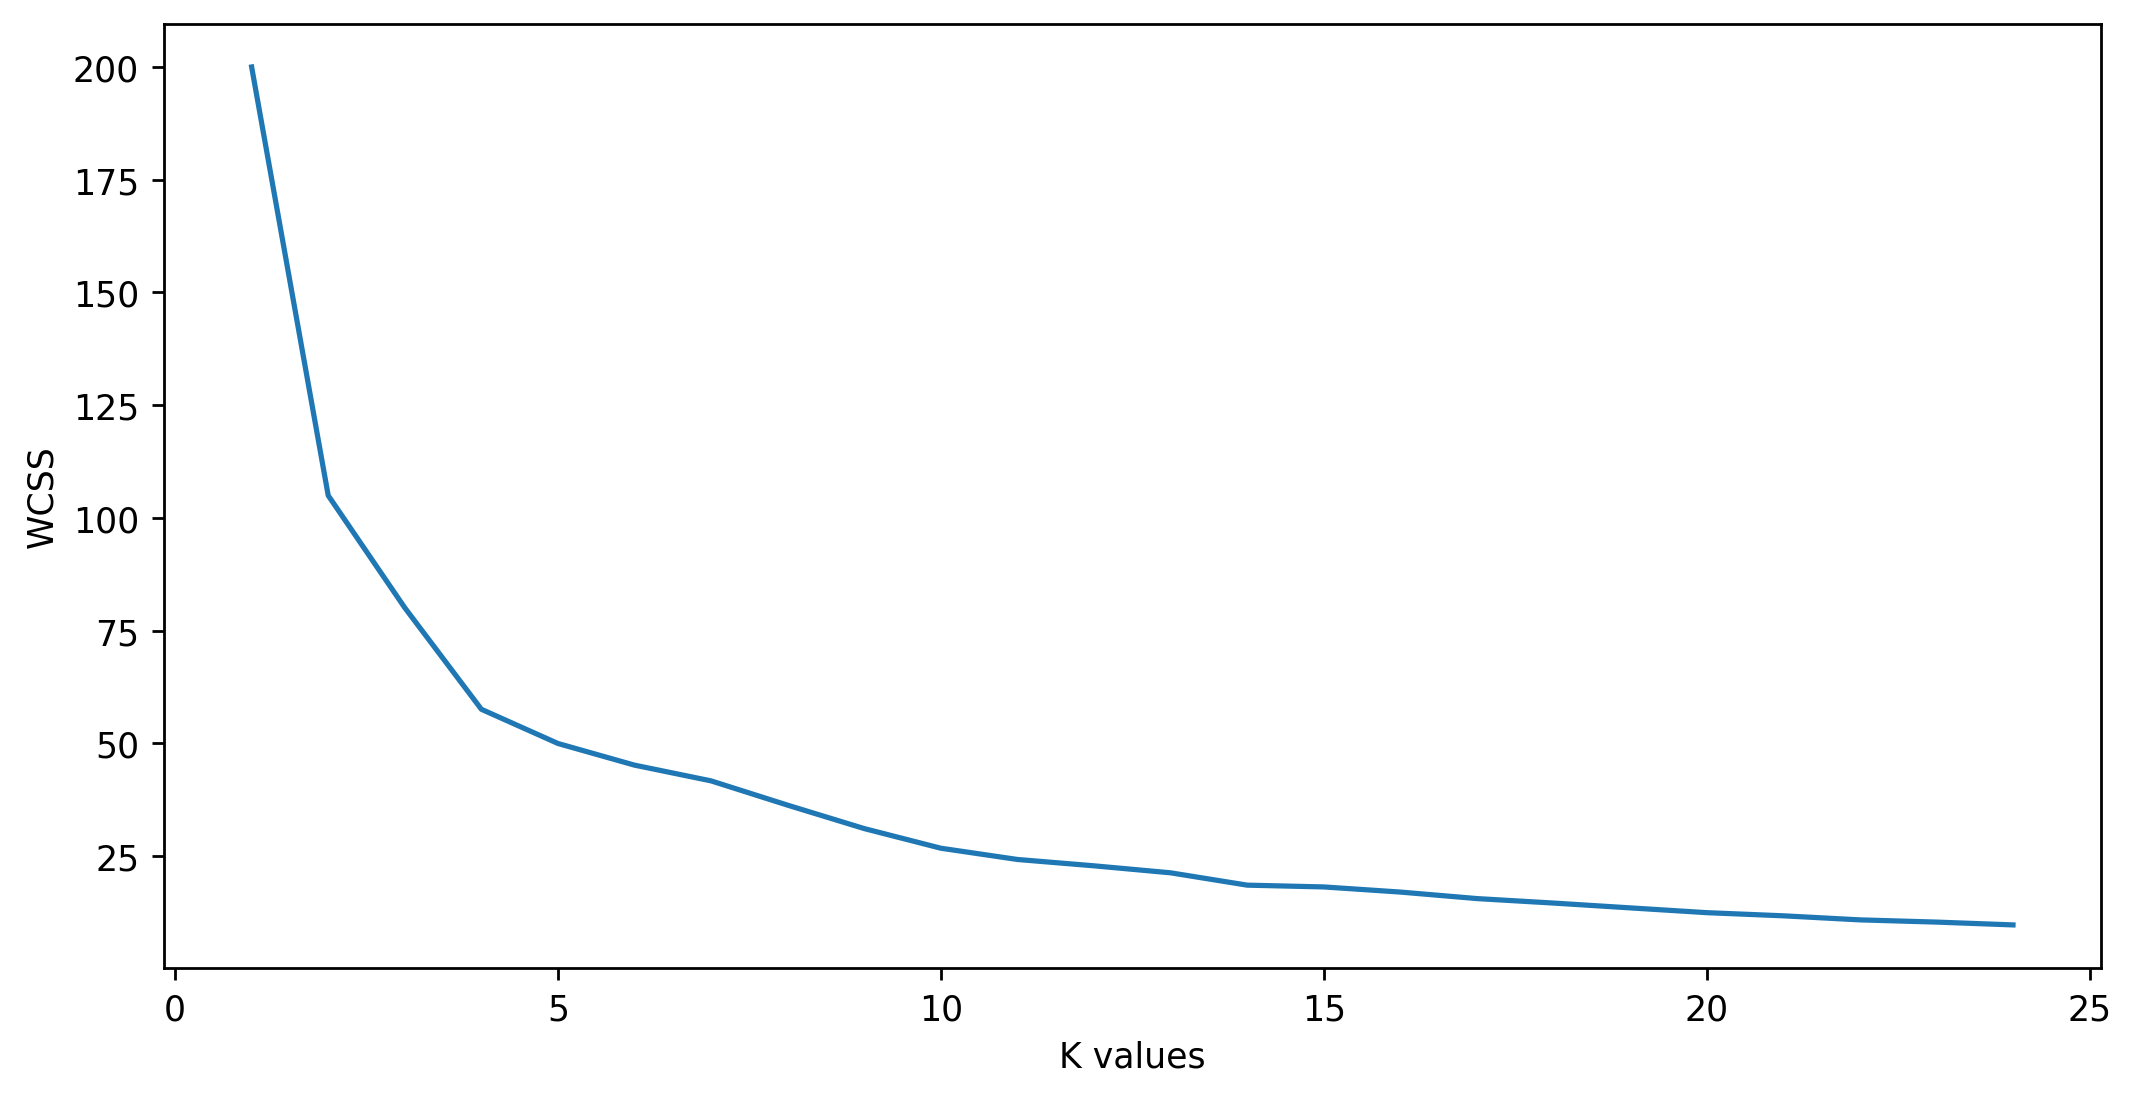

In [22]:
plt.plot(range(1,25), wcss)
plt.xlabel('K values')
plt.ylabel('WCSS')

In [23]:
km = KMeans(n_clusters=4)
y = km.fit_predict(x1)
y

array([0, 3, 3, 0, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1, 3,
       2, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 2, 1])

In [24]:
x1['Cluster'] = y

x1

,0,1,2,3,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,0
1,0.513019,1.118060,-1.224067,2.509424,3
2,0.072361,1.493817,1.009122,1.053466,3
3,0.234708,0.233212,-1.084492,-0.186794,0
4,0.281093,1.275635,1.776781,2.088814,3
5,0.025976,0.402909,0.869548,1.883901,3
6,-1.040880,-0.736484,0.799761,-1.092723,1
7,-0.437875,0.815030,0.450825,-0.585834,1
8,1.765415,1.990786,1.009122,1.150530,3
9,2.229265,0.487757,-0.386621,0.492653,0


In [25]:
km.cluster_centers_

array([[ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383]])

In [26]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


In [27]:
df[df['Cluster'] == 1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Cluster
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
27,Nevada,12.2,252,81,46.0,1
30,New Mexico,11.4,285,70,32.1,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [65]:
x2

,0,1,2,3,Cluster
0,1.255179,0.790787,-0.526195,-0.003451,3
1,0.513019,1.118060,-1.224067,2.509424,7
2,0.072361,1.493817,1.009122,1.053466,2
3,0.234708,0.233212,-1.084492,-0.186794,4
4,0.281093,1.275635,1.776781,2.088814,5
5,0.025976,0.402909,0.869548,1.883901,5
6,-1.040880,-0.736484,0.799761,-1.092723,0
7,-0.437875,0.815030,0.450825,-0.585834,0
8,1.765415,1.990786,1.009122,1.150530,2
9,2.229265,0.487757,-0.386621,0.492653,3


In [66]:
x = x2.iloc[:,:-1]
y = x2['Cluster']

In [68]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [69]:
lg = LogisticRegression()
lg.fit(xtrain,ytrain)
ypred = lg.predict(xtest)

In [70]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2

    accuracy                           0.90        10
   macro avg       0.78      0.83      0.80        10
weighted avg       0.83      0.90      0.86        10



## DBSCAN Clustering

In [28]:
from sklearn.cluster import DBSCAN

In [88]:
db = DBSCAN()
db.fit(x)

DBSCAN()

In [72]:
db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [73]:
from sklearn.metrics import silhouette_score

In [91]:
db  =DBSCAN(eps=2, min_samples=3)

db.fit_predict(x)

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [92]:
silhouette_score(x,db.labels_)

0.23455598753159795

In [93]:
df['Y'] = db.labels_

df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Y
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0


In [94]:
df[df['Y']==-1]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Y
1,Alaska,10.0,263,48,44.5,-1


In [96]:
df[df['Y']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Y
0,Alabama,13.2,236,58,21.2,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
10,Hawaii,5.3,46,83,20.2,0


In [97]:
df.groupby('Y').agg('mean')

,Murder,Assault,UrbanPop,Rape
Y,,,,
-1,10.000000,263.000000,48.000000,44.500000
0,7.742857,168.877551,65.897959,20.757143
